# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [ ]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [ ]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

In [ ]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

In [ ]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

In [ ]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

In [ ]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [ ]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [ ]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

## Train Agent on Pendulum Task
Use Pendulum task from OpenAI gym.

In [1]:
import matplotlib.pyplot as plt

# you must include '%matplotlib notebook' for this to work
##%matplotlib notebook

time_limit = 300
y1_lower = -70
y1_upper = 50
y2_lower = -1
y2_upper = 1

# generate plot function
def plt_dynamic(fig, sub1, sub2, x, y1, y2, color_y1='g', color_y2='b'):
   sub1.plot(x, y1, color_y1)
   sub2.plot(x, y2, color_y2)
   fig.canvas.draw()

def plt_clear(fig):
    fig.clear()

def plt_init():
    # create plots
    fig, sub1= plt.subplots(1,1)
    sub2 = sub1.twinx()

    # set plot boundaries
    sub1.set_xlim(0, time_limit) # this is typically time
    sub1.set_ylim(y1_lower, y1_upper) # limits to your y1
    sub2.set_xlim(0, time_limit) # time, again
    sub2.set_ylim(y2_lower, y2_upper) # limits to your y2

    # set labels and colors for the axes
    sub1.set_xlabel('time (s)', color='k') 
    sub1.set_ylabel('y1-axis label', color='g')
    sub1.tick_params(axis='x', colors='k')
    sub1.tick_params(axis='y', colors="g")

    sub2.set_ylabel('y2-axis label', color='b') 
    sub2.tick_params(axis='y', colors='b')
    
    return fig, sub1, sub2
    

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Episode =    1, total reward = -6448.558
Episode =    2, total reward = -5156.551
Episode =    3, total reward = -6718.546
Episode =    4, total reward = -7438.513
Episode =    5, total reward = -6924.697
Episode =    6, total reward = -7026.758
Episode =    7, total reward = -7189.688
Episode =    8, total reward = -6891.935
Episode =    9, total reward = -7423.917
Episode =   10, total reward = -7393.652
Episode =   11, total reward = -6805.174
Episode =   12, total reward = -7396.496
Episode =   13, total reward = -6315.465
Episode =   14, total reward = -6682.790
Episode =   15, total reward = -7323.361
Episode =   16, total reward = -6470.626
Episode =   17, total reward = -7301.444
Episode =   18, total reward = -6686.550
Episode =   19, total reward = -7372.275
Episode =   20, total r

<IPython.core.display.Javascript object>


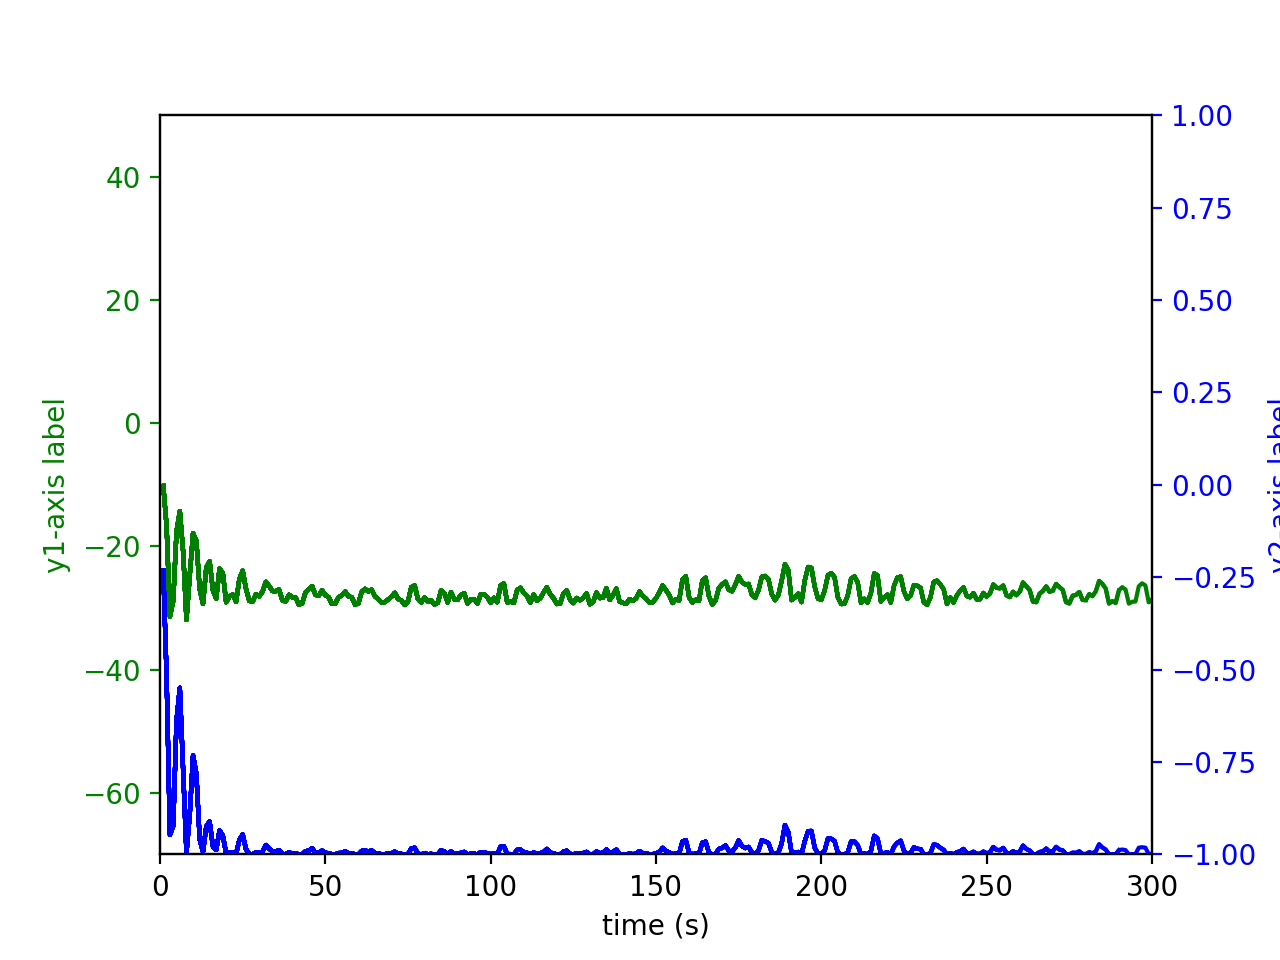

Episode =   25, total reward = -8242.039
Episode =   26, total reward = -7549.179
Episode =   27, total reward = -7287.875
Episode =   28, total reward = -7785.406
Episode =   29, total reward = -7348.590
Episode =   30, total reward = -7026.811
Episode =   31, total reward = -6926.573
Episode =   32, total reward = -6848.606
Episode =   33, total reward = -6374.914
Episode =   34, total reward = -6897.802
Episode =   35, total reward = -5481.706
Episode =   36, total reward = -5056.596
Episode =   37, total reward = -7332.122
Episode =   38, total reward = -6458.924
Episode =   39, total reward = -5655.022
Episode =   40, total reward = -6451.576
Episode =   41, total reward = -7369.678
Episode =   42, total reward = -6744.230
Episode =   43, total reward = -7007.918
Episode =   44, total reward = -5194.875
Episode =   45, total reward = -7343.048
Episode =   46, total reward = -5495.088
Episode =   47, total reward = -5706.357
Episode =   48, total reward = -7137.637
Episode =   49, 

<IPython.core.display.Javascript object>


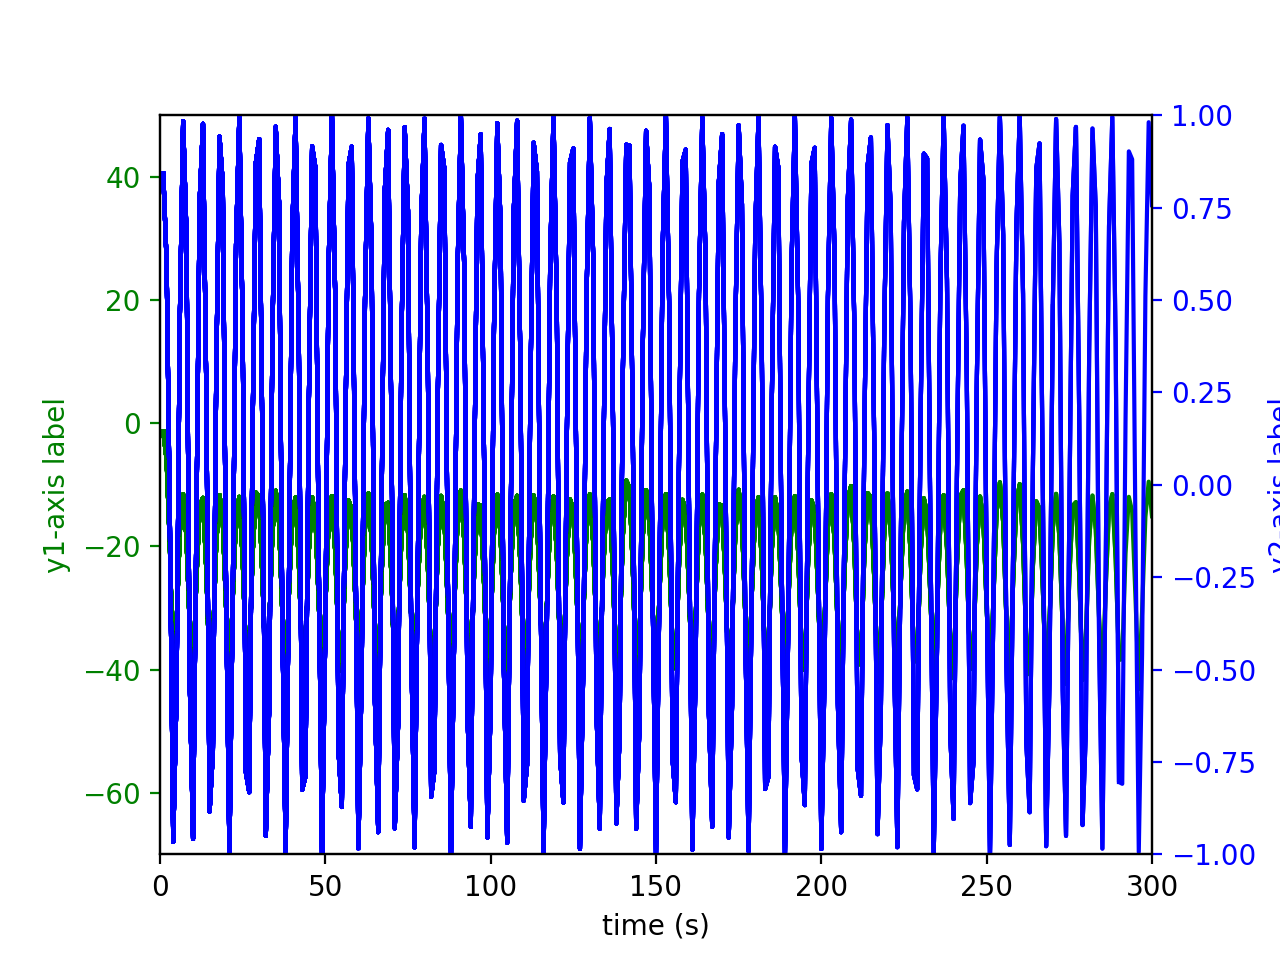

Episode =   50, total reward = -7419.762
Episode =   51, total reward = -6321.544
Episode =   52, total reward = -7362.654
Episode =   53, total reward = -7344.233
Episode =   54, total reward = -7351.377
Episode =   55, total reward = -6522.859
Episode =   56, total reward = -7410.062
Episode =   57, total reward = -6565.068
Episode =   58, total reward = -6860.969
Episode =   59, total reward = -6403.904
Episode =   60, total reward = -7344.019
Episode =   61, total reward = -6294.487
Episode =   62, total reward = -6486.899
Episode =   63, total reward = -6725.048
Episode =   64, total reward = -6592.312
Episode =   65, total reward = -7348.080
Episode =   66, total reward = -6207.716
Episode =   67, total reward = -6790.066
Episode =   68, total reward = -7395.377
Episode =   69, total reward = -6157.655
Episode =   70, total reward = -7302.312
Episode =   71, total reward = -7333.056
Episode =   72, total reward = -6344.084
Episode =   73, total reward = -7386.494
Episode =   74, 

<IPython.core.display.Javascript object>


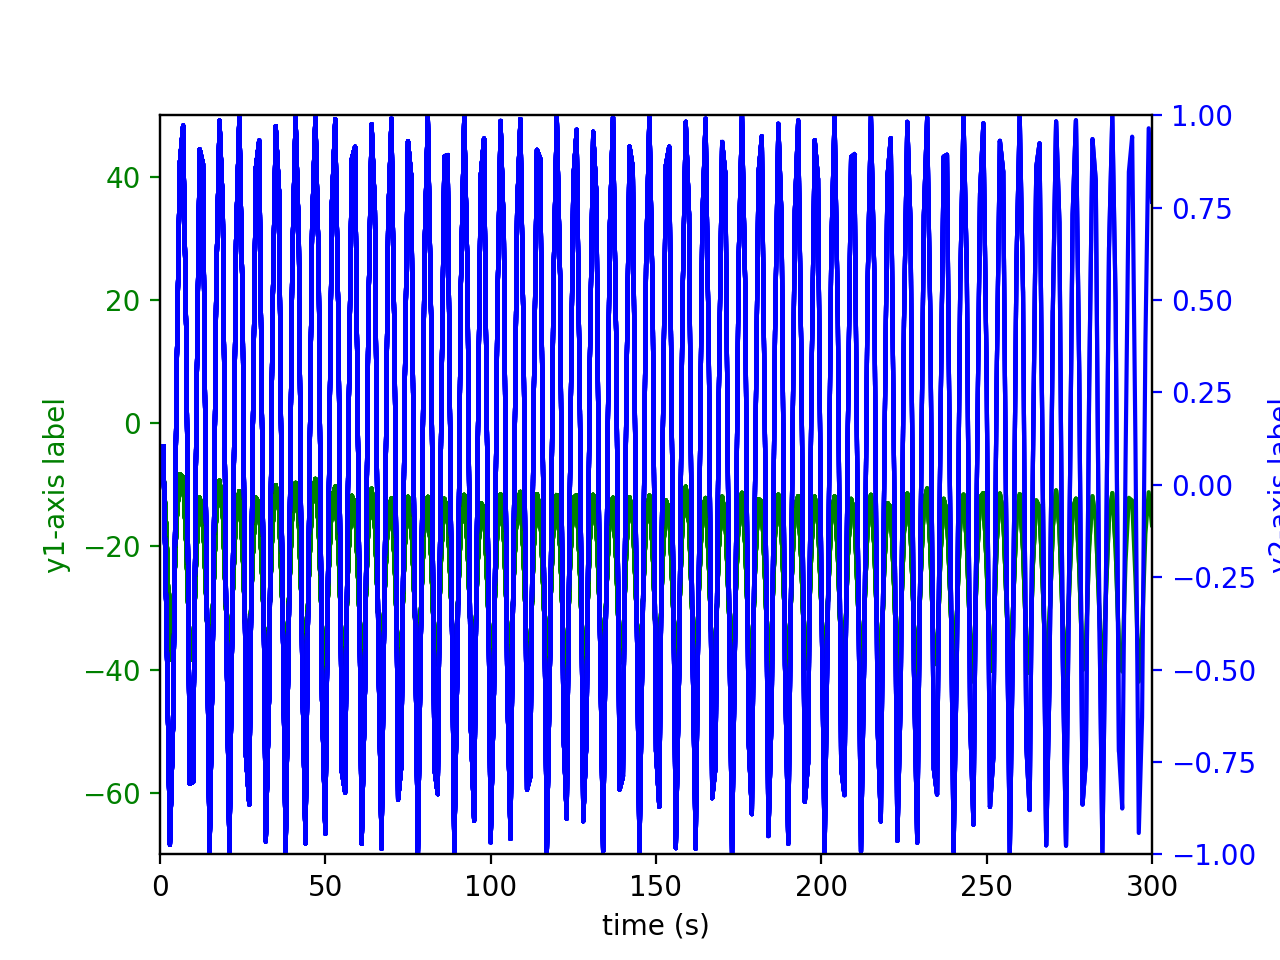

Episode =   75, total reward = -7408.537
Episode =   76, total reward = -7345.599
Episode =   77, total reward = -6326.292
Episode =   78, total reward = -6063.079
Episode =   79, total reward = -5672.120
Episode =   80, total reward = -5364.612
Episode =   81, total reward = -5788.607
Episode =   82, total reward = -6078.433
Episode =   83, total reward = -6700.592
Episode =   84, total reward = -7363.487
Episode =   85, total reward = -5611.627
Episode =   86, total reward = -7086.995
Episode =   87, total reward = -7267.764
Episode =   88, total reward = -5303.817
Episode =   89, total reward = -6573.974
Episode =   90, total reward = -6580.067
Episode =   91, total reward = -7354.196
Episode =   92, total reward = -6163.811
Episode =   93, total reward = -5931.836
Episode =   94, total reward = -5660.663
Episode =   95, total reward = -7369.481
Episode =   96, total reward = -6880.481
Episode =   97, total reward = -7337.362
Episode =   98, total reward = -6896.321
Episode =   99, 

<IPython.core.display.Javascript object>


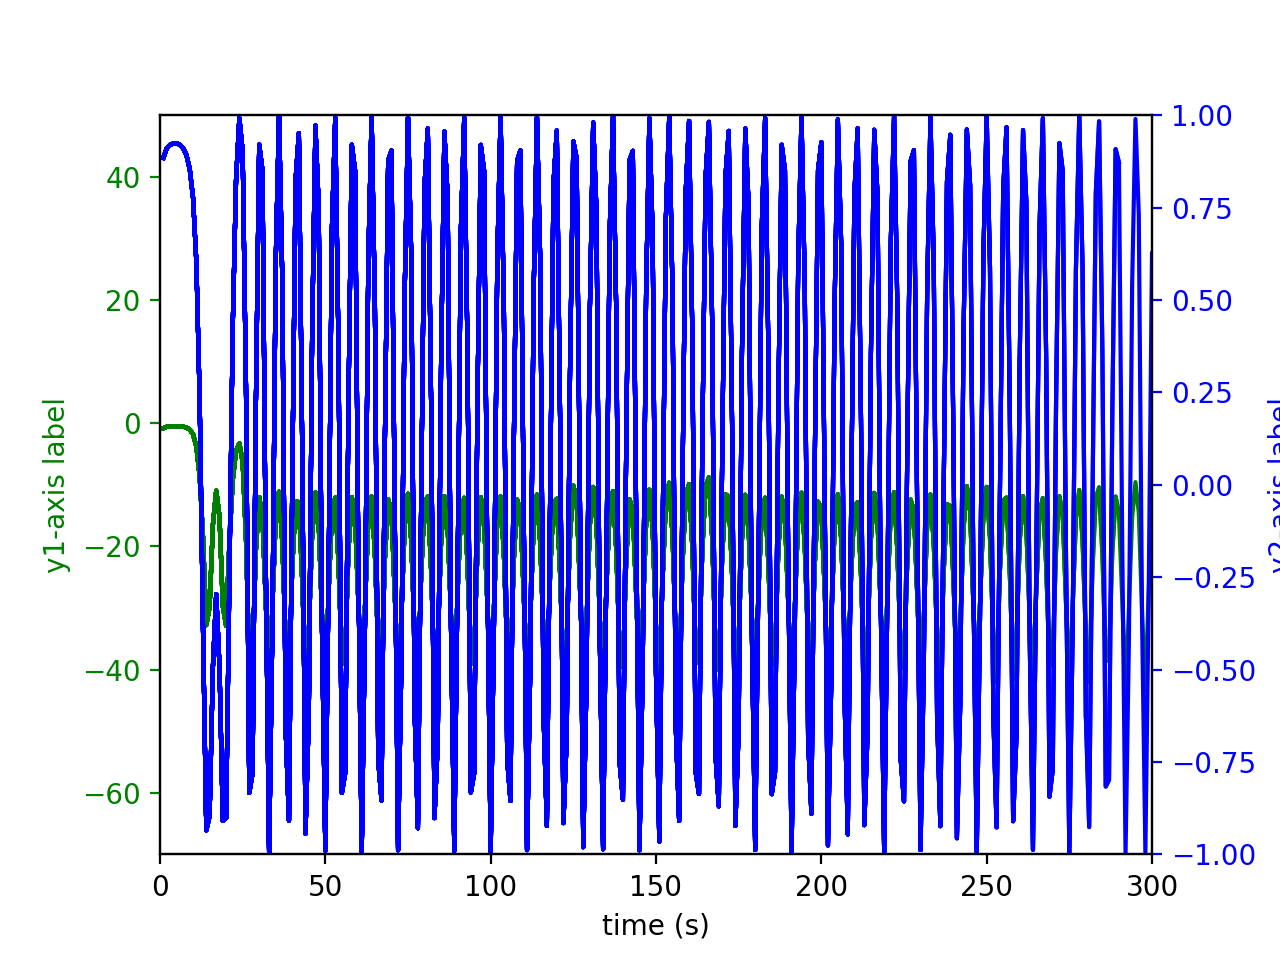

Episode =  100, total reward = -7063.501
Episode =  101, total reward = -7349.882
Episode =  102, total reward = -6106.238
Episode =  103, total reward = -6507.125
Episode =  104, total reward = -6453.818
Episode =  105, total reward = -7345.845
Episode =  106, total reward = -5755.995
Episode =  107, total reward = -7368.465
Episode =  108, total reward = -7346.829
Episode =  109, total reward = -7192.738
Episode =  110, total reward = -5247.416
Episode =  111, total reward = -5940.722
Episode =  112, total reward = -6009.276
Episode =  113, total reward = -7083.099
Episode =  114, total reward = -6608.467
Episode =  115, total reward = -6613.155
Episode =  116, total reward = -5748.891
Episode =  117, total reward = -7367.354
Episode =  118, total reward = -7361.955
Episode =  119, total reward = -7374.198
Episode =  120, total reward = -7333.384
Episode =  121, total reward = -7437.620
Episode =  122, total reward = -6896.410
Episode =  123, total reward = -7233.163
Episode =  124, 

<IPython.core.display.Javascript object>


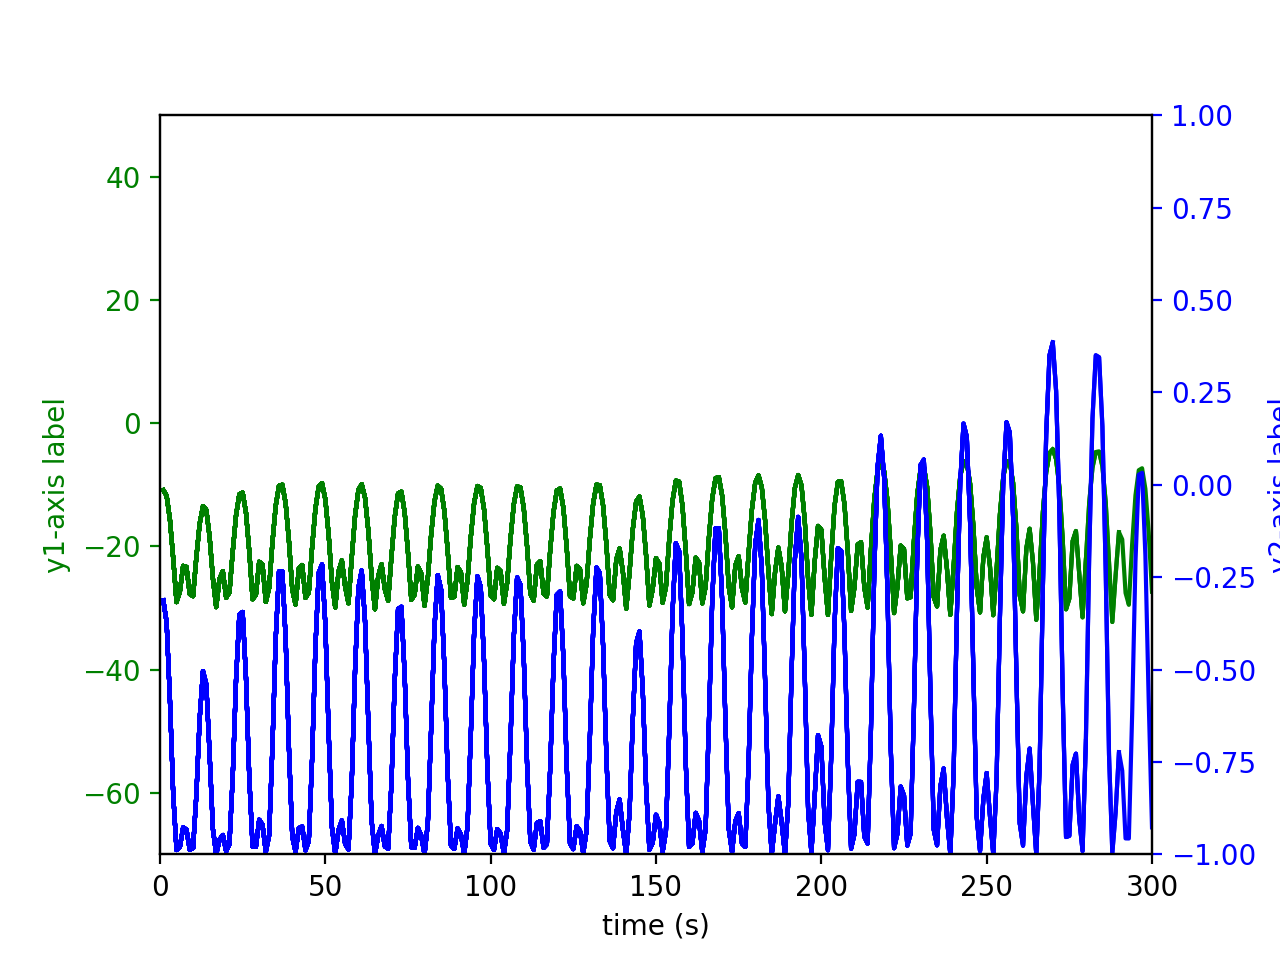

Episode =  125, total reward = -5948.640
Episode =  126, total reward = -5789.274
Episode =  127, total reward = -6618.563
Episode =  128, total reward = -7300.646
Episode =  129, total reward = -6558.653
Episode =  130, total reward = -7364.143
Episode =  131, total reward = -7350.536
Episode =  132, total reward = -6548.891
Episode =  133, total reward = -7319.165
Episode =  134, total reward = -7075.102
Episode =  135, total reward = -5398.745
Episode =  136, total reward = -7198.485
Episode =  137, total reward = -7337.965
Episode =  138, total reward = -6008.934
Episode =  139, total reward = -7016.975
Episode =  140, total reward = -6413.915
Episode =  141, total reward = -5899.391
Episode =  142, total reward = -7485.276
Episode =  143, total reward = -6772.097
Episode =  144, total reward = -6261.973
Episode =  145, total reward = -6962.369
Episode =  146, total reward = -7262.526
Episode =  147, total reward = -5281.761
Episode =  148, total reward = -7403.784
Episode =  149, 

<IPython.core.display.Javascript object>


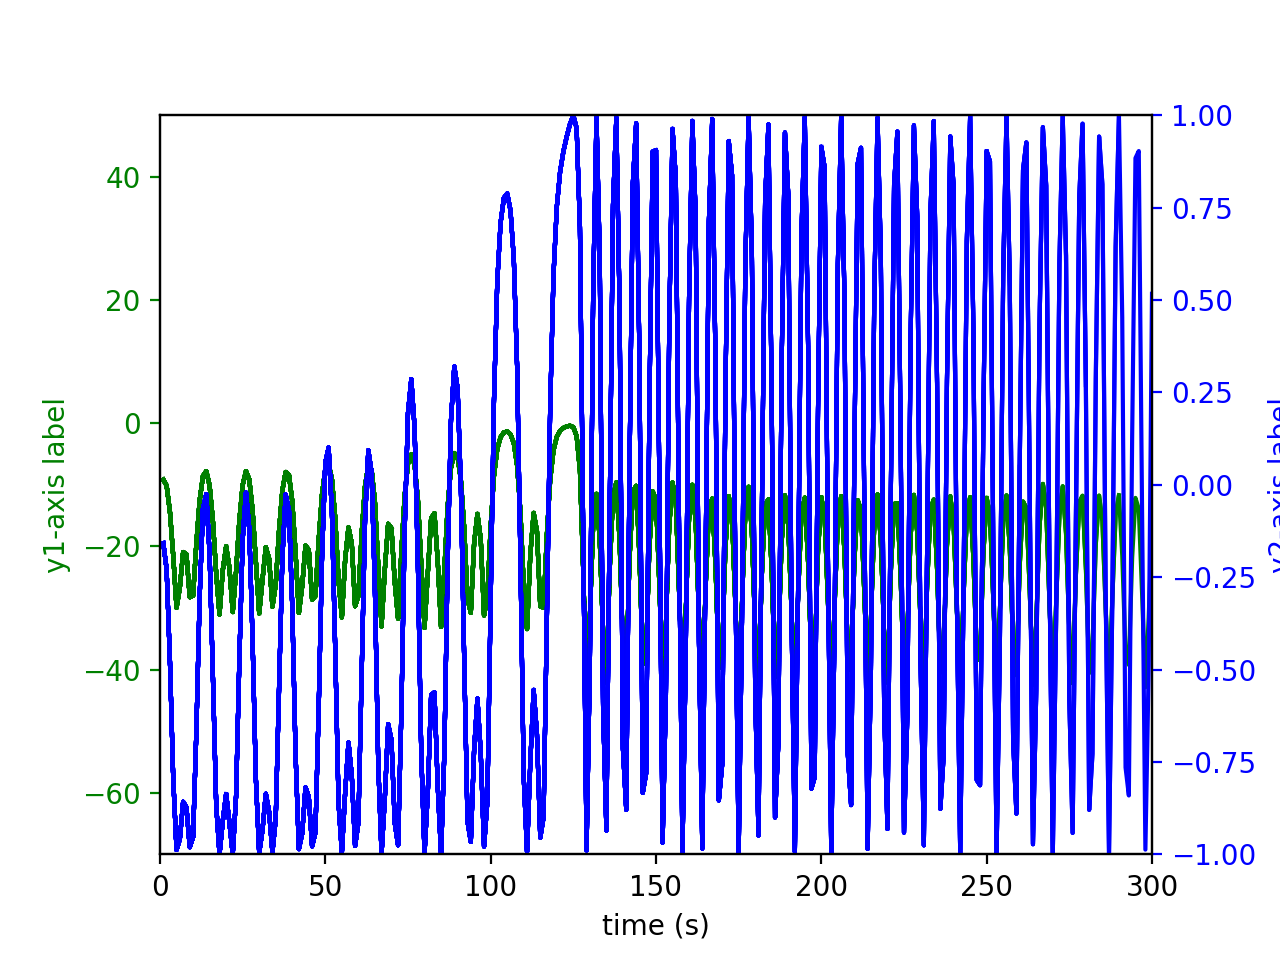

Episode =  150, total reward = -6462.227
Episode =  151, total reward = -6684.238
Episode =  152, total reward = -7359.357
Episode =  153, total reward = -4986.785
Episode =  154, total reward = -6101.335
Episode =  155, total reward = -7358.007
Episode =  156, total reward = -7347.296
Episode =  157, total reward = -6448.492
Episode =  158, total reward = -5877.844
Episode =  159, total reward = -7150.552
Episode =  160, total reward = -7366.488
Episode =  161, total reward = -7335.996
Episode =  162, total reward = -6704.099
Episode =  163, total reward = -4970.220
Episode =  164, total reward = -6628.751
Episode =  165, total reward = -7374.172
Episode =  166, total reward = -6524.199
Episode =  167, total reward = -6625.104
Episode =  168, total reward = -7346.608
Episode =  169, total reward = -7382.479
Episode =  170, total reward = -6537.828
Episode =  171, total reward = -6916.139
Episode =  172, total reward = -7362.324
Episode =  173, total reward = -6065.227
Episode =  174, 

<IPython.core.display.Javascript object>


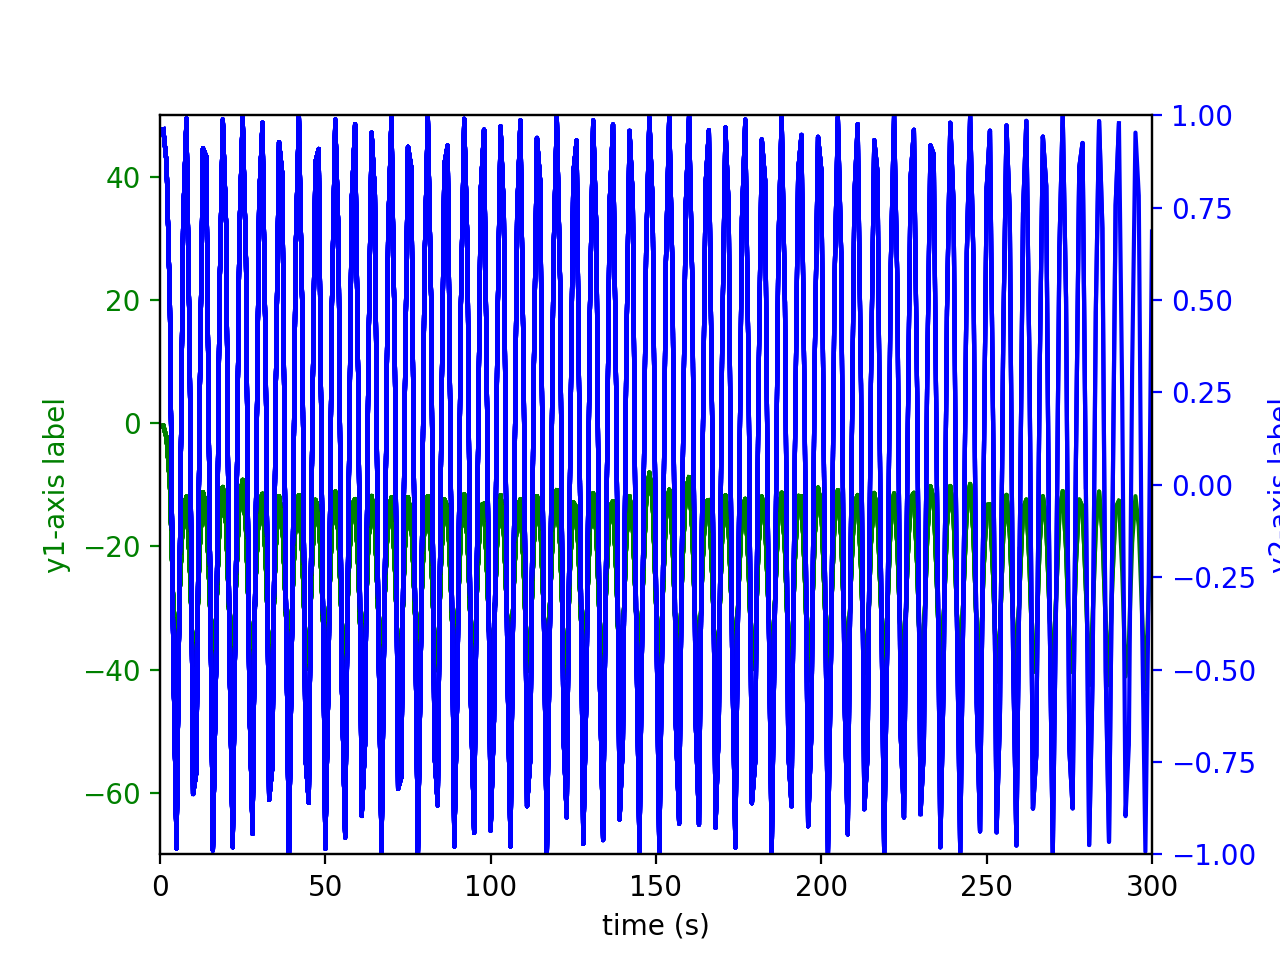

Episode =  175, total reward = -7376.382
Episode =  176, total reward = -6987.428
Episode =  177, total reward = -5839.910
Episode =  178, total reward = -6434.744
Episode =  179, total reward = -6712.099
Episode =  180, total reward = -7332.109
Episode =  181, total reward = -6135.248
Episode =  182, total reward = -6582.721
Episode =  183, total reward = -7350.487
Episode =  184, total reward = -6955.524
Episode =  185, total reward = -7367.443
Episode =  186, total reward = -7457.267
Episode =  187, total reward = -7345.136
Episode =  188, total reward = -6677.418
Episode =  189, total reward = -5678.634
Episode =  190, total reward = -6930.569
Episode =  191, total reward = -5930.885
Episode =  192, total reward = -6890.255
Episode =  193, total reward = -6827.457
Episode =  194, total reward = -7033.576
Episode =  195, total reward = -6159.568
Episode =  196, total reward = -7360.763
Episode =  197, total reward = -5835.800
Episode =  198, total reward = -5358.117
Episode =  199, 

<IPython.core.display.Javascript object>


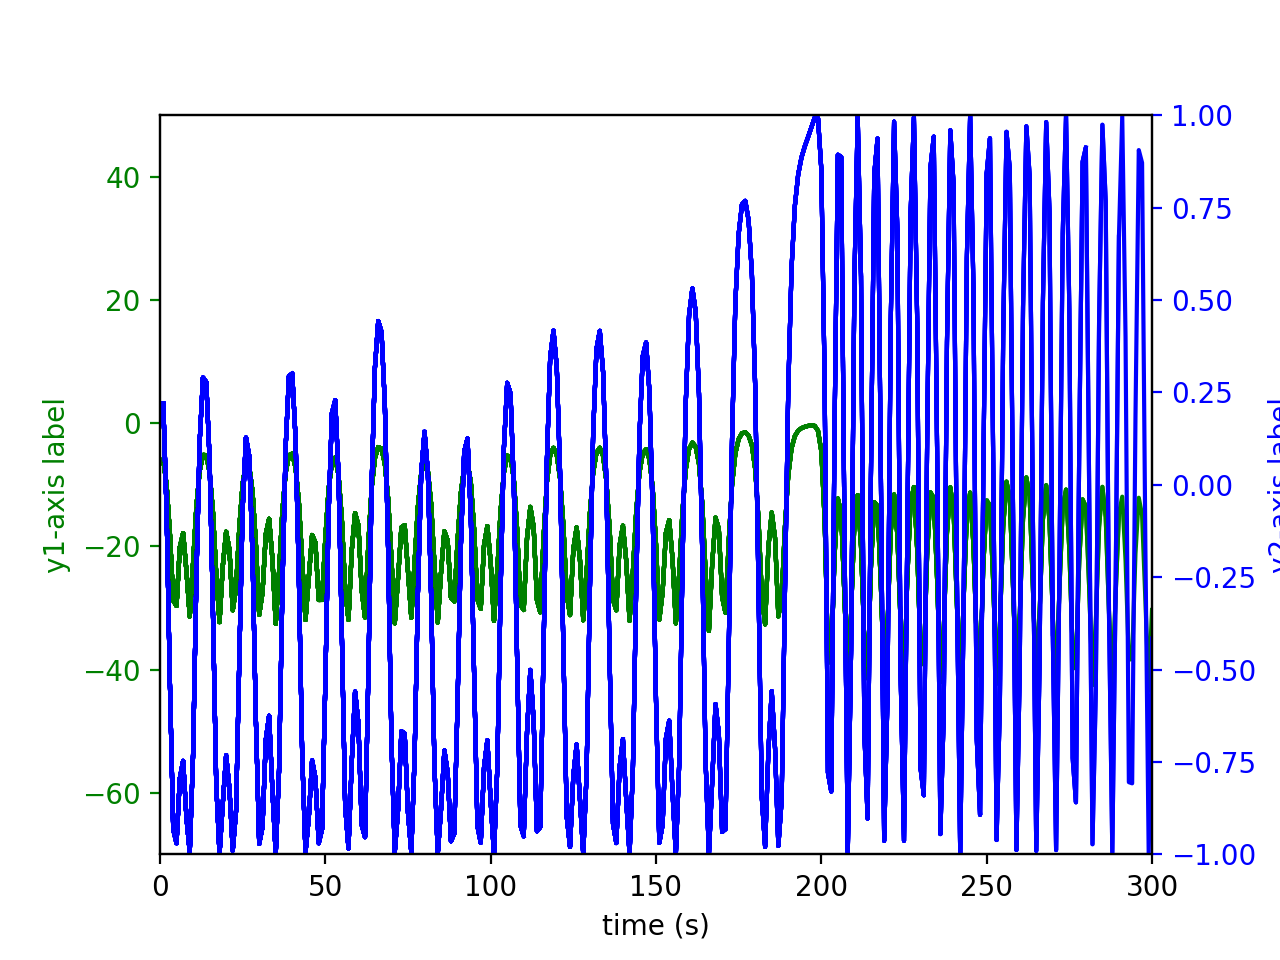

Episode =  200, total reward = -5798.990
Episode =  201, total reward = -6715.958
Episode =  202, total reward = -5801.084
Episode =  203, total reward = -7374.558
Episode =  204, total reward = -7330.961
Episode =  205, total reward = -6926.908
Episode =  206, total reward = -7469.152
Episode =  207, total reward = -7467.483
Episode =  208, total reward = -7008.142
Episode =  209, total reward = -5625.010
Episode =  210, total reward = -7340.342
Episode =  211, total reward = -5891.664
Episode =  212, total reward = -7219.790
Episode =  213, total reward = -6878.819
Episode =  214, total reward = -7460.643
Episode =  215, total reward = -7387.013
Episode =  216, total reward = -6077.676
Episode =  217, total reward = -7380.741
Episode =  218, total reward = -7316.297
Episode =  219, total reward = -7390.306
Episode =  220, total reward = -5667.840
Episode =  221, total reward = -6881.858
Episode =  222, total reward = -5120.537
Episode =  223, total reward = -7345.411
Episode =  224, 

<IPython.core.display.Javascript object>


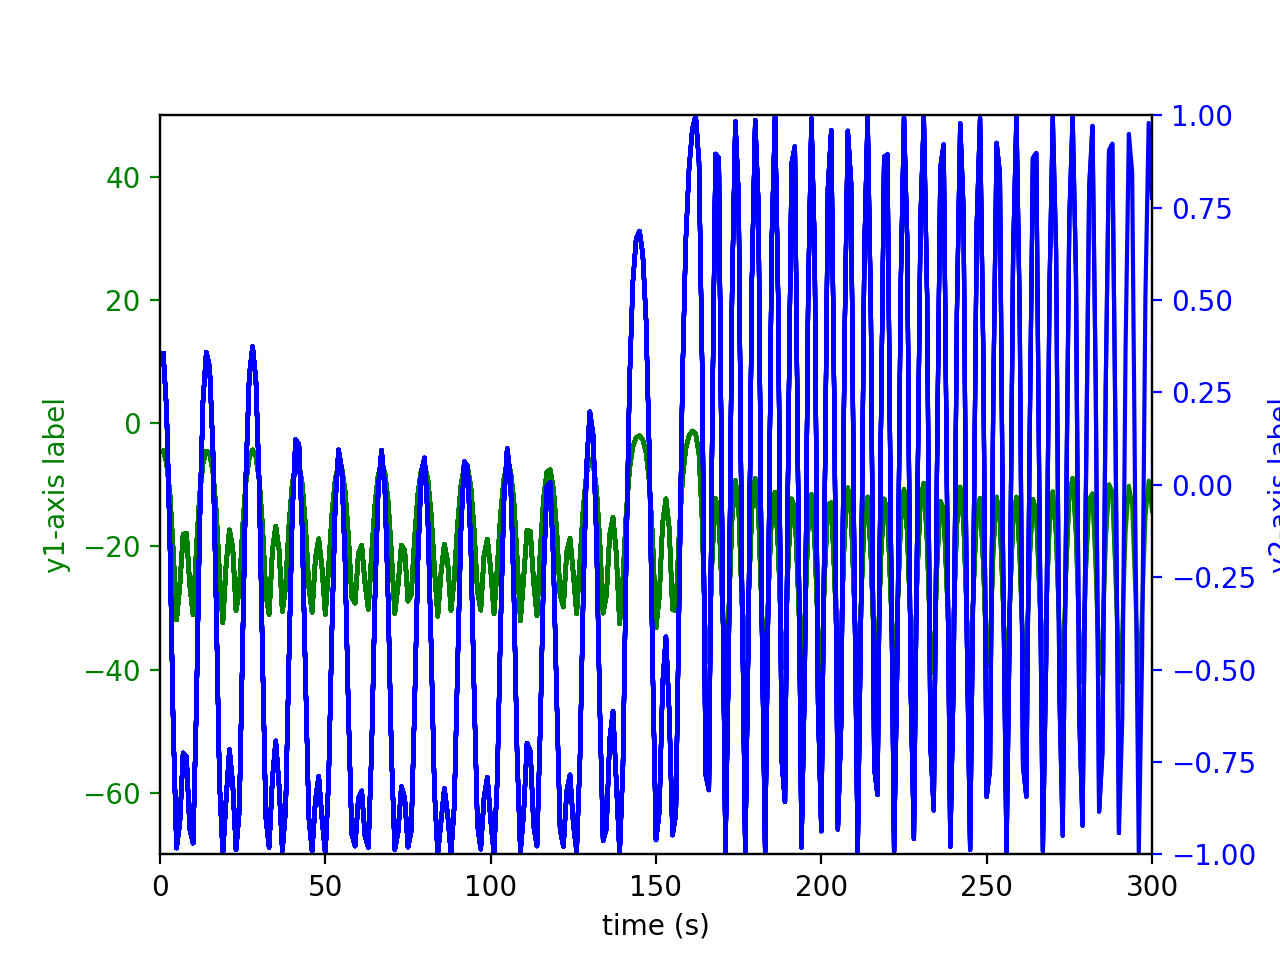

Episode =  225, total reward = -6235.324
Episode =  226, total reward = -7058.016
Episode =  227, total reward = -7341.660
Episode =  228, total reward = -7360.160
Episode =  229, total reward = -7358.261
Episode =  230, total reward = -7232.336
Episode =  231, total reward = -7414.830
Episode =  232, total reward = -6228.039
Episode =  233, total reward = -6816.546
Episode =  234, total reward = -7360.206
Episode =  235, total reward = -7380.908
Episode =  236, total reward = -6075.294
Episode =  237, total reward = -5385.648
Episode =  238, total reward = -5975.169
Episode =  239, total reward = -7276.055
Episode =  240, total reward = -5808.093
Episode =  241, total reward = -7368.998
Episode =  242, total reward = -5767.575
Episode =  243, total reward = -5805.649
Episode =  244, total reward = -7227.256
Episode =  245, total reward = -6896.295
Episode =  246, total reward = -7327.655
Episode =  247, total reward = -6976.857
Episode =  248, total reward = -7305.683
Episode =  249, 

<IPython.core.display.Javascript object>


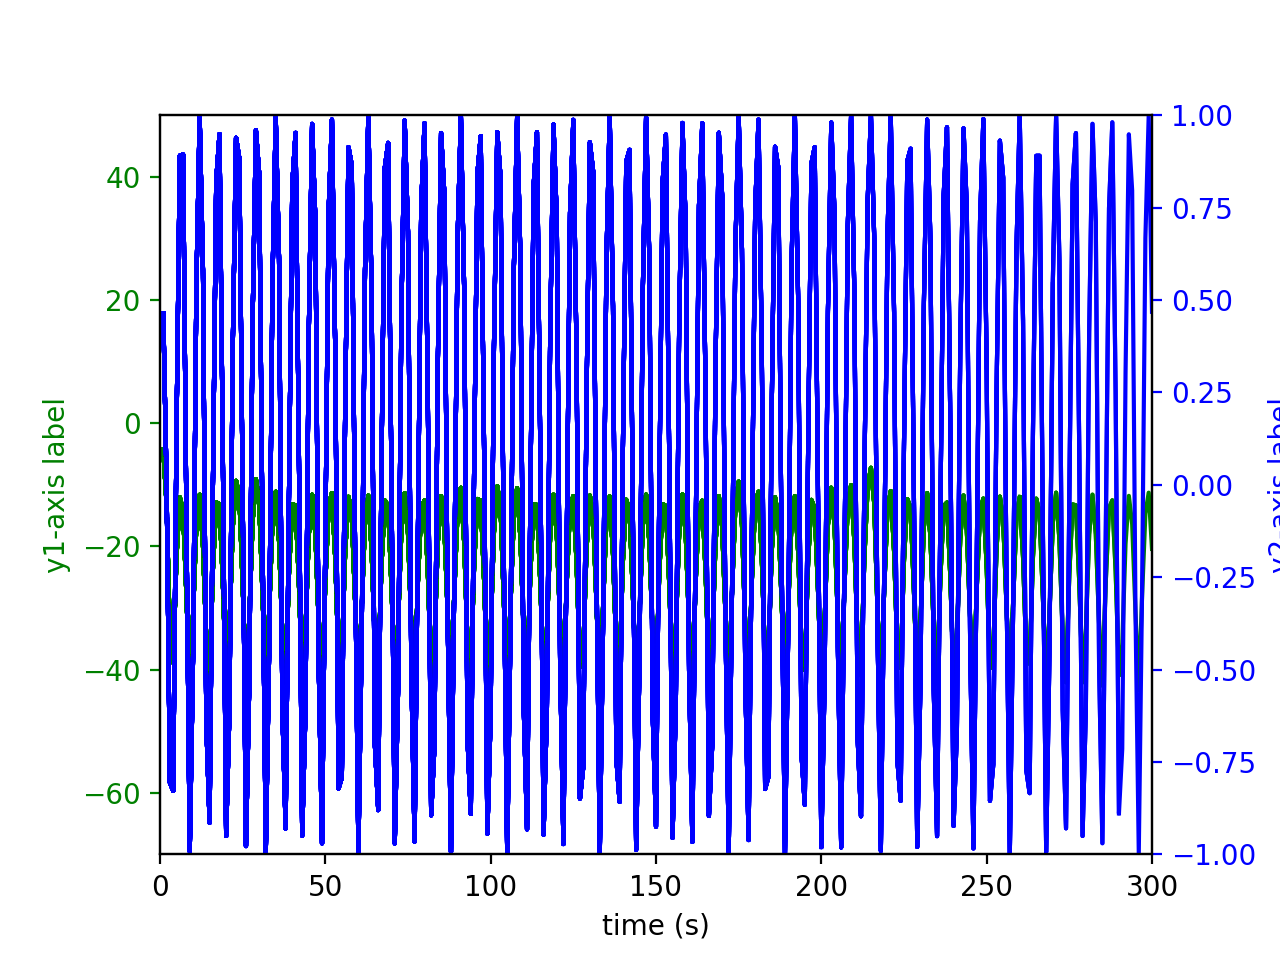

Episode =  250, total reward = -7427.753


In [3]:
# you must include '%matplotlib notebook' for this to work
%matplotlib notebook

import gym
import sys
from agents.agent import DDPG
from pendulum_task import PendulumTask

num_episodes = 250
task = PendulumTask()
agent = DDPG(task) 

display_freq = 25
display_step_freq = 10

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    
    
    display_graph = i_episode % display_freq == 0
    if display_graph:
        # prior to the start of each episode, clear the datapoints
        x, y1, y2 = [], [], []    
        fig, sub1, sub2 = plt_init()

    step = 0
    total_reward = 0
    
    while True:
        step += 1
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total_reward += reward
        # within the episode loop
        if display_graph:
            x.append(step) # time
            y1.append(reward) # y-axis 1 values
            y2.append(next_state[0]) # y-axis 2 values
            
            if step % display_step_freq == 0:
                plt_dynamic(fig, sub1, sub2, x, y1, y2)
            
            #print(task.current_steps)
            #print(f'Episode number {i_episode}')
            #print(f'action {action}, reward {reward}, next_state {next_state}, done {done}')
        #    print(f'Plot values - time {task.sim.time}, reward {reward}, z {task.sim.pose[2]}')
        #if done:
        #    print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
        #        i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
        #    break
        if done:
            print("\rEpisode = {:4d}, total reward = {:7.3f}".format(
                i_episode, total_reward))  # [debug]
        #    if (episode % display_freq == 0) and (display_graph == True):
        #               plt_dynamic(x, y1, y2)
            break

    #if display_graph:  
    #    plt_clear(fig)
    #sys.stdout.flush()

In [ ]:
init_pose = [0., 0., 10., 0., 0., 0.]
inital_velocity = [0., 0., 0.]
init_angle_velocities = [0., 0., 0.]

In [ ]:
import matplotlib as plt

# you must include '%matplotlib notebook' for this to work
%matplotlib notebook

time_limit = 1
y1_lower = -10
y1_upper = 10
y2_lower = 0
y2_upper = 20

# generate plot function
def plt_dynamic(x, y1, y2, color_y1='g', color_y2='b'):
   sub1.plot(x, y1, color_y1)
   sub2.plot(x, y2, color_y2)
   fig.canvas.draw()

# create plots
fig, sub1= plt.subplots(1,1)
sub2 = sub1.twinx()

# set plot boundaries
sub1.set_xlim(0, time_limit) # this is typically time
sub1.set_ylim(y1_lower, y1_upper) # limits to your y1
sub2.set_xlim(0, time_limit) # time, again
sub2.set_ylim(y2_lower, y2_upper) # limits to your y2

# set labels and colors for the axes
sub1.set_xlabel('time (s)', color='k') 
sub1.set_ylabel('y1-axis label', color='g')
sub1.tick_params(axis='x', colors='k')
sub1.tick_params(axis='y', colors="g")

sub2.set_ylabel('y2-axis label', color='b') 
sub2.tick_params(axis='y', colors='b')

In [ ]:
x, y1, y2 = [], [], [] 

for i in range(100):
    x.append(i)
    y1.append(i)
    y2.append(2 * i)
    plt_dynamic(x, y1, y2)

In [ ]:
import sys
import pandas as pd
from agents.agent import DDPG
from task import Task

num_episodes = 100
target_pos = np.array([0., 0., 20.])
task = Task(init_pose=init_pose, init_velocities=init_velocities,
            init_angle_velocities=init_angle_velocities,target_pos=target_pos)
agent = DDPG(task) 

display_graph = True
display_freq = 5

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    
    # prior to the start of each episode, clear the datapoints
    x, y1, y2 = [], [], []    
    
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        # within the episode loop
        if (i_episode % display_freq == 0) and (display_graph == True):
            x.append(task.sim.time) # time
            y1.append(reward) # y-axis 1 values
            y2.append(task.sim.pose[2]) # y-axis 2 values
        
            print(f'Episode number {i_episode}')
            print(f'action {action}, reward {reward}, next_state {next_state}, done {done}')
            print(f'Plot values - time {task.sim.time}, reward {reward}, z {task.sim.pose[2]}')
        #if done:
        #    print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
        #        i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
        #    break
        if done:
            print("\rEpisode = {:4d}, reward = {:7.3f}".format(
                i_episode, reward), end="")  # [debug]
            if (episode % display_freq == 0) and (display_graph == True):
                       plt_dynamic(x, y1, y2)
            break
       
    sys.stdout.flush()

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [ ]:
## TODO: Plot the rewards.

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: